In [18]:
import pandas as pd

YEAR =2014
GDP_INDICATOR = 'NY.GDP.MKTP.CD'
gdpReset = pd.read_csv('WB GDP 2013.csv')
POP_INDICATOR ='SP.POP.TOTL'
popReset = pd.read_csv('WB POP 2013.csv')
popReset.head()


,country,year,SP.POP.TOTL
0,Arab World,2013,3.770967e+08
1,Caribbean small states,2013,6.975819e+06
2,Central Europe and the Baltics,2013,1.037137e+08
3,East Asia & Pacific (all income levels),2013,2.248867e+09
4,East Asia & Pacific (developing only),2013,2.006073e+09


CLEANING THE DATASET

In [19]:
gdpCountries = gdpReset[34:].dropna()
popCountries = popReset[34:].dropna()


TRANSFORMING THE DATA

In [39]:
def roundToMillions (value):
    return round(value / 1000000)

def usdToGBP (usd):
    return usd / 1.564768

GDP = 'GDP (£m)'
gdpCountries[GDP] = gdpCountries[GDP_INDICATOR].apply(usdToGBP).apply(roundToMillions)
gdpCountries.head()

,country,year,NY.GDP.MKTP.CD,GDP (£m)
34,Afghanistan,2013,2.045894e+10,13075
35,Albania,2013,1.278103e+10,8168
36,Algeria,2013,2.097035e+11,134016
38,Andorra,2013,3.249101e+09,2076
39,Angola,2013,1.383568e+11,88420


In [40]:
def roundPopMillions (value):
    return round(value /1000)
POP = 'Pop (m)'
popCountries[POP] = popCountries[POP_INDICATOR].apply(roundPopMillions)
headings =[COUNTRY,POP]
popClean = popCountries[headings]
popClean.head()

,country,Pop (m)
34,Afghanistan,30682
35,Albania,2897
36,Algeria,38186
37,American Samoa,55
38,Andorra,76


In [41]:
COUNTRY = 'country'
headings = [COUNTRY,GDP]
gdpClean = gdpCountries[headings]
gdpClean.head()


,country,GDP (£m)
34,Afghanistan,13075
35,Albania,8168
36,Algeria,134016
38,Andorra,2076
39,Angola,88420


MERGE DATASET

In [42]:
gdpVsPop = pd.merge(gdpClean,popClean, on=COUNTRY, how='inner')
gdpVsPop.head()

,country,GDP (£m),Pop (m)
0,Afghanistan,13075,30682
1,Albania,8168,2897
2,Algeria,134016,38186
3,Andorra,2076,76
4,Angola,88420,23448


CORRELATION CALCULATION

In [43]:
from scipy.stats import spearmanr

gdpColumn = gdpVsPop[GDP]
PopColumn = gdpVsPop[POP]
(correlation, pValue) = spearmanr(gdpColumn,PopColumn)
print('The correlation is',correlation)
print('The pValue is',pValue)

if pValue < 0.05:
    print('It is statistically significant.')
else:
    print('It is not statistically significant.')

The correlation is 0.7334565656837039
The pValue is 1.0949297617756328e-33
It is statistically significant.


gdpVsPop has a stronger relationship(correlation) than gdpVsLife.

SHOWING THE DATA

<AxesSubplot:xlabel='GDP (£m)', ylabel='Pop (m)'>

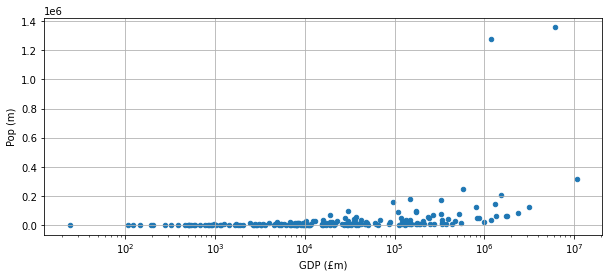

In [44]:
%matplotlib inline
gdpVsPop.plot(x=GDP, y=POP, kind='scatter', grid=True,logx=True, figsize=(10,4))

In [45]:
# the 10 countries with lowest GDP
gdpVsPop.sort_values(GDP).head(10)

,country,GDP (£m),Pop (m)
178,Tuvalu,24,10
89,Kiribati,108,109
110,Marshall Islands,122,53
131,Palau,146,21
145,Sao Tome and Principe,195,182
114,"Micronesia, Fed. Sts.",202,104
173,Tonga,277,105
49,Dominica,324,72
38,Comoros,383,752
162,St. Vincent and the Grenadines,461,109


In [46]:
gdpVsPop.sort_values(POP).head(10)

,country,GDP (£m),Pop (m)
178,Tuvalu,24,10
131,Palau,146,21
57,Faeroe Islands,1670,48
110,Marshall Islands,122,53
160,St. Kitts and Nevis,503,54
19,Bermuda,3562,65
49,Dominica,324,72
3,Andorra,2076,76
149,Seychelles,902,90
5,Antigua and Barbuda,767,90
